<a href="https://colab.research.google.com/github/Simon-Minchk/VGSALESDATA/blob/master/Video_Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import random
from matplotlib import rc

In [0]:
#made to originally upload file
df = pd.read_csv('https://raw.githubusercontent.com/Simon-Minchk/VGSALESDATA/master/vgsales.csv')
df = df.dropna()
df_platform = pd.read_csv('https://raw.githubusercontent.com/Simon-Minchk/VGSALESDATA/master/vgsales.csv')
df_platform = df_platform.dropna()
df_genre = pd.read_csv('https://raw.githubusercontent.com/Simon-Minchk/VGSALESDATA/master/vgsales.csv')
df_genre = df_genre.dropna()

In [0]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [0]:
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64

In [0]:
new_df = df[df['Platform'] == "DS"]

Total = new_df['Global_Sales'].sum()
print(Total)

818.9100000000001


In [0]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [0]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [0]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [0]:
#made to restrict size of graph
df_genre = df_genre.drop(df_genre[df_genre.Genre == 'Puzzle'].index)
df_genre = df_genre.drop(df_genre[df_genre.Genre == 'Strategy'].index)

In [0]:
df_genre['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Name: Genre, dtype: int64

In [0]:
df_platform['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [0]:
Big_Companies = df['Publisher'].value_counts()

In [0]:
Big_Companies[Big_Companies > 100]

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

In [0]:
df[df['Publisher'].isin(Big_Companies[Big_Companies > 1000].index)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002.0,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16384,16387,Poker for Dummies,PC,2008.0,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16413,16416,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
16539,16542,Spore Galactic Adventures,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [0]:
df_Big = df.groupby('Publisher').filter(lambda x : len(x)>=4)

In [0]:
pd.crosstab(df_Big['Publisher'], df_Big['Platform'])

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Publisher,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20th Century Fox Video Games,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3DO,0,0,0,0,0,0,0,1,0,0,5,0,0,0,16,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0
505 Games,0,0,3,0,65,0,0,0,0,0,0,0,0,4,0,22,15,6,10,1,0,0,0,0,0,30,2,27,1,6
5pb,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,10,1,12,14,0,0,0,0,0,0,0,15,0,1
7G//AMES,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoo Digital Publishing,0,0,0,0,26,0,38,1,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,18,0,0,10,0
Zoo Games,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,1,0,0
Zushi Games,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,0,2,0,0


In [0]:
df.loc[df['Platform'] == 'DS', 'Global_Sales'].sum()

818.9100000000001

In [0]:
df.loc[df['Platform'] == 'PS2', 'Global_Sales'].sum()

1233.46

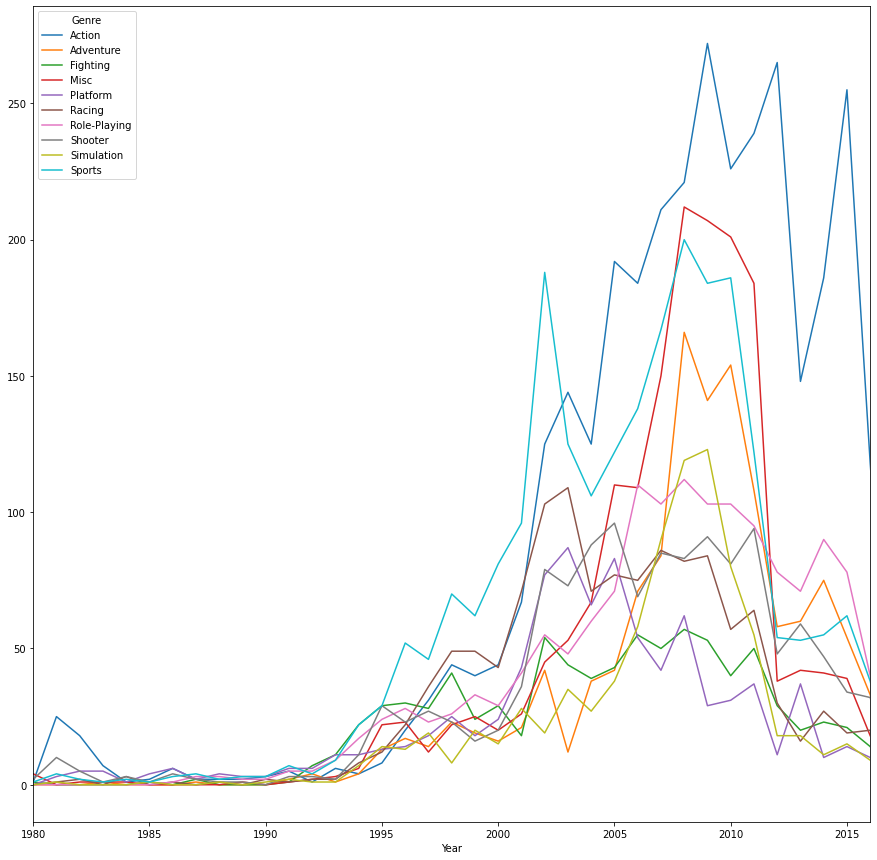

In [0]:
#The Blue in the lead at the start is Sports and the Blue at the end in the lead is Action
pd.crosstab(df_genre['Year'], df_genre['Genre']).plot(figsize=(15,15), xlim=(1980,2016))

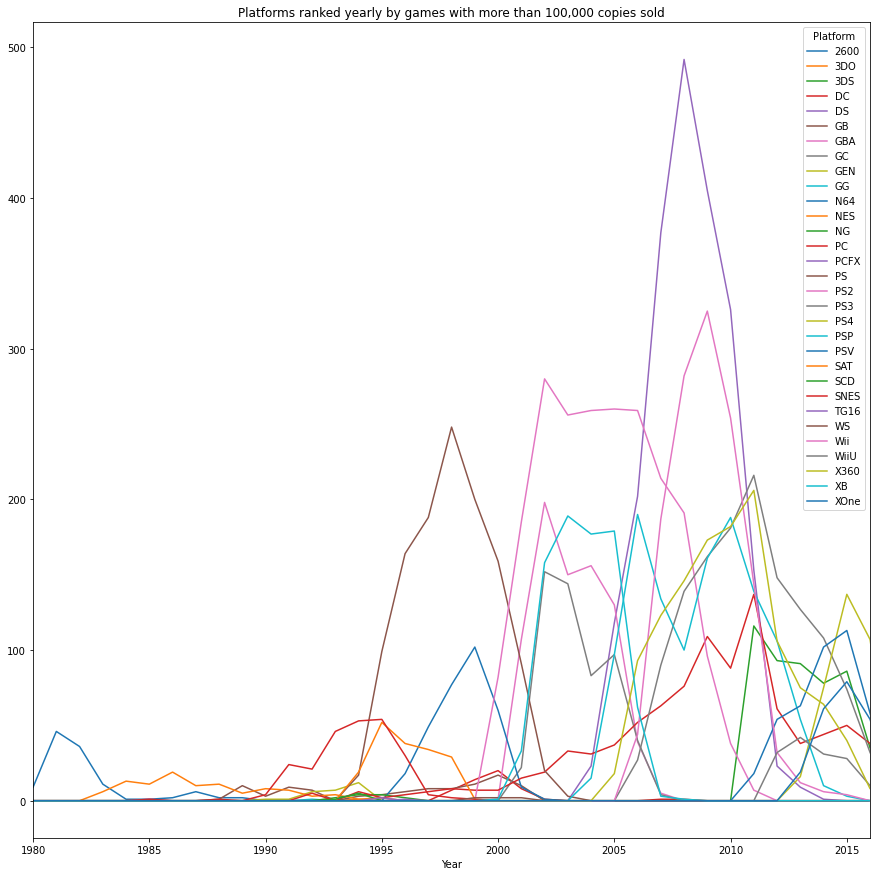

In [0]:
pd.crosstab(df_platform['Year'], df_platform['Platform']).plot(figsize=(15,15), xlim=(1980,2016), title=("Platforms ranked yearly by games with more than 100,000 copies sold"))

In [64]:
def co_up(Platform,Year):
    global top10
    Platform_df = df_platform[df_platform['Platform'] == Platform]
    updated_co_df = Platform_df[Platform_df['Year'] == Year]
    sumrate = updated_co_df['Global_Sales'].sum()

    data = {'Platform': Platform,
            'Global Sales': sumrate,
            'Year': Year}
    top10 = top10.append(data, ignore_index=True)


data = {'Platform': [],
        'Global Sales':[],
        'Year': []}
top10 = pd.DataFrame(data=data)

top10

,Platform,Global Sales,Year


In [65]:
company_list = ['DS', 'GBA','PC','PS','PS2','PS3','PSP','Wii','X360','XB']

for i in company_list:
  for j in range(1995, 2016):
    co_up(i, j)

top10.head(30)

,Platform,Global Sales,Year
0,DS,0.00,1995.0
1,DS,0.00,1996.0
2,DS,0.00,1997.0
3,DS,0.00,1998.0
4,DS,0.00,1999.0
5,DS,0.00,2000.0
6,DS,0.00,2001.0
7,DS,0.00,2002.0
8,DS,0.00,2003.0
9,DS,17.46,2004.0


In [66]:
import plotly.express as px
df_fixed = top10
fig1 = px.line(df_fixed, x="Year", y="Global Sales", color="Platform",
              line_group="Platform", hover_name="Platform")
fig1.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig1.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig1.write_html("plotfig1.html")
fig1.show()

In [0]:
df_platform = df_platform.drop(df_platform[df_platform.Platform == '2600'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'WiiU'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'SAT'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'XOne'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'SNES'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'N64'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'PS4'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == '3DS'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'GC'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'PSV'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'WS'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == '3DO'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'TG16'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'PCFX'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'GG'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'SCD'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'NG'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'GEN'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'SCD'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'DC'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'GB'].index)
df_platform = df_platform.drop(df_platform[df_platform.Platform == 'NES'].index)

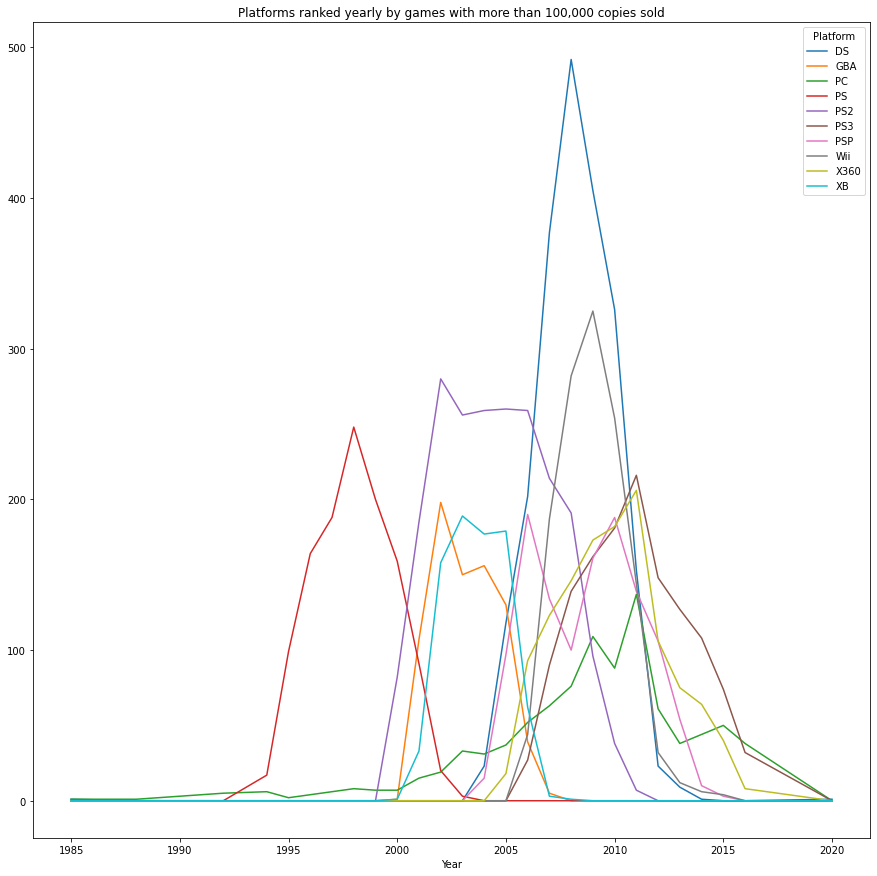

In [0]:
pd.crosstab(df['Year'], df_platform['Platform']).plot(figsize=(15,15), title=("Platforms ranked yearly by games with more than 100,000 copies sold"))

In [0]:
df_platform['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: Platform, dtype: int64